# Explore here

In [3]:
#importar dataframe

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv" , sep = ",")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
## informacion del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
#filtrar dataframe con las columnas requeridas

X = df[["Latitude","Longitude","MedInc"]]
X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [6]:
#dividir el conjunto de datos
from sklearn.model_selection import train_test_split


X_train, X_test = train_test_split(X, train_size= 0.8, random_state= 42 )
X_train.head()


,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542


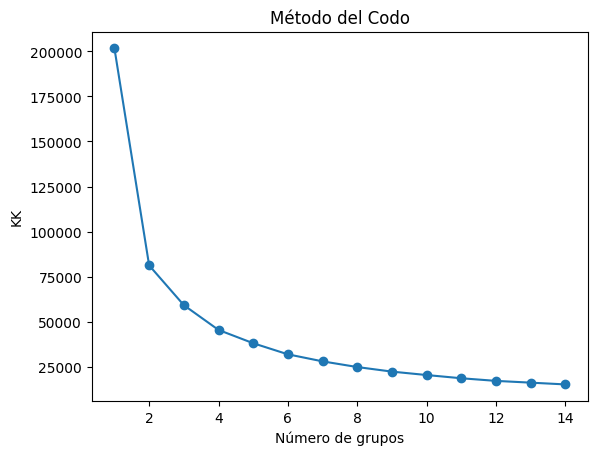

In [8]:
#validacion de numero de cluster optimos

### Busqueda de El K
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

KK = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_train)
    KK.append(kmeans.inertia_)

# Gráfico del codo
plt.plot(range(1, 15), KK, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

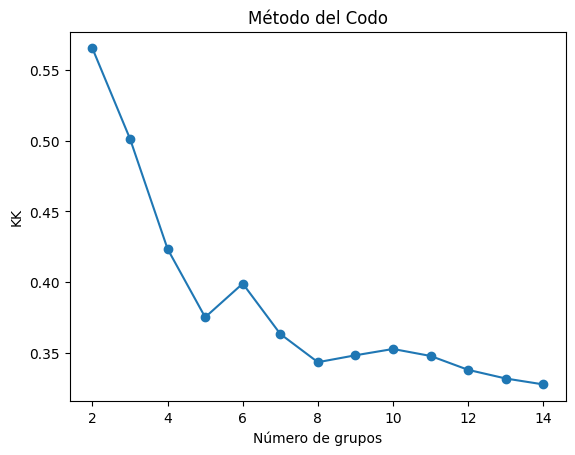

In [10]:
### Importar libreria
from sklearn.metrics import silhouette_score
from sklearn import metrics

import matplotlib.pyplot as plt

silhouette_scores = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)

    predict = kmeans.predict(X_train)
    silhouette_avg = metrics.silhouette_score(X_train, predict)
    silhouette_scores.append(silhouette_avg)

# Gráfico del codo
plt.plot(range(2, 15), silhouette_scores, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de grupos')
plt.ylabel('KK')
plt.show()

In [12]:
#modelo ideal

ideal_model = KMeans (n_clusters = 6, n_init = "auto", random_state= 42)
ideal_model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [15]:

ideal_model.cluster_centers_[:, 0]

array([37.68747253, 33.88940929, 33.84943618, 34.04157015, 35.87817073,
       38.14364263])

In [16]:
X_train

,Latitude,Longitude,MedInc
14196,32.71,-117.03,3.2596
8267,33.77,-118.16,3.8125
17445,34.66,-120.48,4.1563
14265,32.69,-117.11,1.9425
2271,36.78,-119.80,3.5542
...,...,...,...
11284,33.78,-117.96,6.3700
11964,34.02,-117.43,3.0500
5390,34.03,-118.38,2.9344
860,37.58,-121.96,5.7192


In [17]:
#determinar y_train
y_train = list(ideal_model.labels_)

#agregar cluster al conjunto de datos de entrenamiento
X_train['cluster'] = y_train
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


In [ ]:
#

In [ ]:
#cantidad de registros por cluster

X_train.

TypeError: 'DataFrame' object is not callable

In [18]:
#PROMEDIO DE INGRESOS POR CLUSTER
X_train.groupby('cluster')['MedInc'].mean()

cluster
0     5.380158
1     4.348026
2     6.939476
3     2.428376
4    11.748734
5     2.740572
Name: MedInc, dtype: float64

In [20]:
X_train.groupby('cluster')['MedInc'].std()

cluster
0    1.124744
1    0.631529
2    1.110431
3    0.622707
4    1.908435
5    0.781223
Name: MedInc, dtype: float64

<Axes: xlabel='Latitude', ylabel='MedInc'>

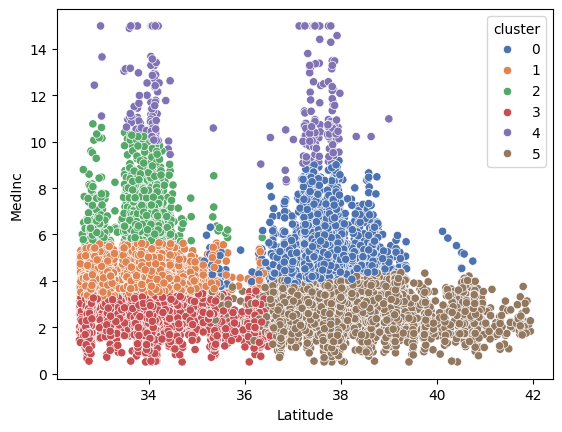

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep" )

<Axes: xlabel='Longitude', ylabel='MedInc'>

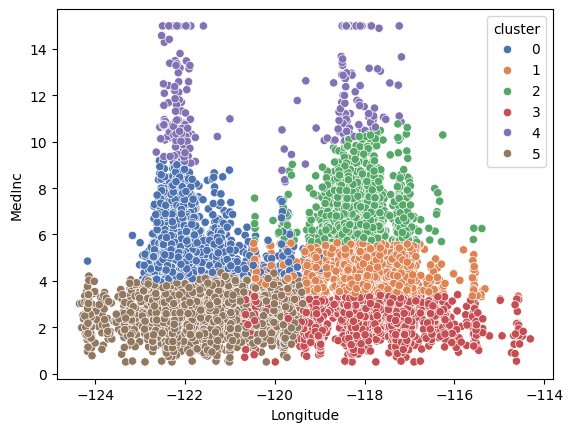

In [29]:
sns.scatterplot(data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep" )

In [30]:
#Prediccion 

y_test = ideal_model.predict(X_test)

X_test['cluster'] = y_test

In [31]:
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


In [32]:
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5
